- https://m-clark.github.io/mixed-models-with-R/random_intercepts.html
- https://www.r-bloggers.com/2017/12/linear-mixed-effect-models-in-r/

In [1]:
library(lme4)
data('sleepstudy')

Loading required package: Matrix



In [2]:
head(sleepstudy)

,Reaction,Days,Subject
,<dbl>,<dbl>,<fct>
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
6,414.6901,5,308


In [3]:
set.seed(1234)
Ngroups = 100
NperGroup = 3
N = Ngroups * NperGroup
groups = factor(rep(1:Ngroups, each=NperGroup))
u = rnorm(Ngroups, sd=.5)
e = rnorm(N, sd=.25)
x = rnorm(N)
y = 2 + .5*x + u[groups] + e

d = data.frame(x, y, groups)
head(d)

,x,y,groups
,<dbl>,<dbl>,<fct>
1,-1.22681509,0.8866905,1
2,0.03615287,1.2958639,1
3,-0.42139311,1.2022689,1
4,-0.89936441,1.5634130,2
5,0.41744132,2.1409356,2
6,0.15344474,2.2571843,2


In [9]:
library(lmerTest)
model = lmer(y ~ x + (1|groups), data=d)
summary(model)


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: y ~ x + (1 | groups)
   Data: d

REML criterion at convergence: 276.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.28382 -0.54016 -0.03464  0.54466  2.46986 

Random effects:
 Groups   Name        Variance Std.Dev.
 groups   (Intercept) 0.22908  0.4786  
 Residual             0.06254  0.2501  
Number of obs: 300, groups:  groups, 100

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   1.93788    0.05001  99.05904   38.75   <2e-16 ***
x             0.50747    0.01752 215.13172   28.97   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
  (Intr)
x 0.029 

In [10]:
confint(model)

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.4108568,0.5568699
.sigma,0.2268842,0.2760810
(Intercept),1.8394120,2.0363239
x,0.4731324,0.5419848


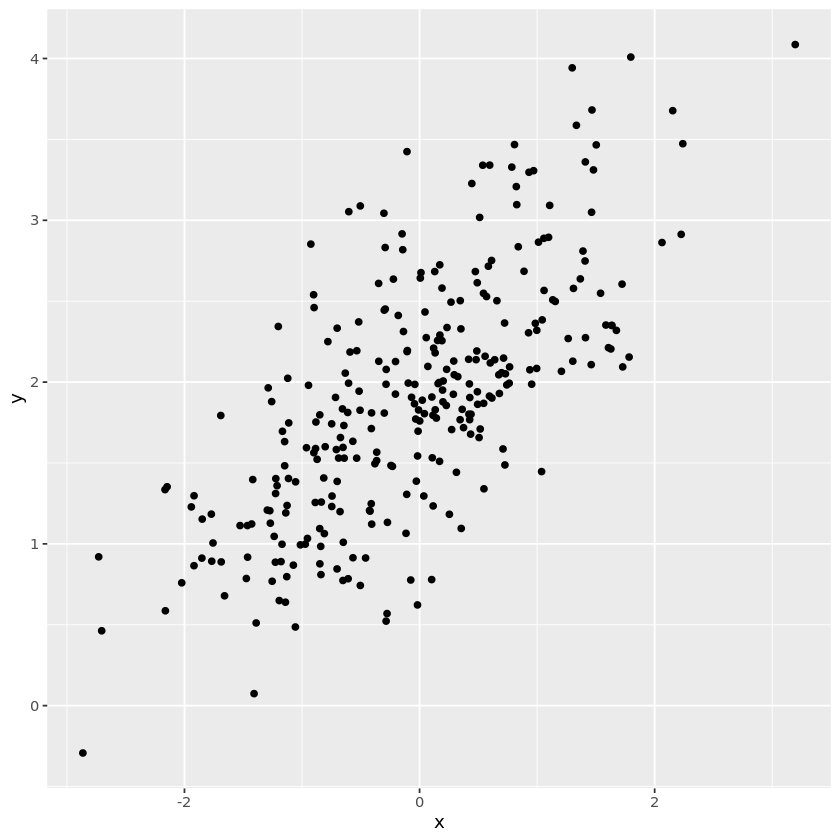

In [11]:
library(ggplot2)
ggplot(aes(x, y), data=d) +
    geom_point()

In [12]:
re = ranef(model)$groups
# qplot(x=re, geom='density', xlim=c(-3,3))
names(re) = paste("Intercept")

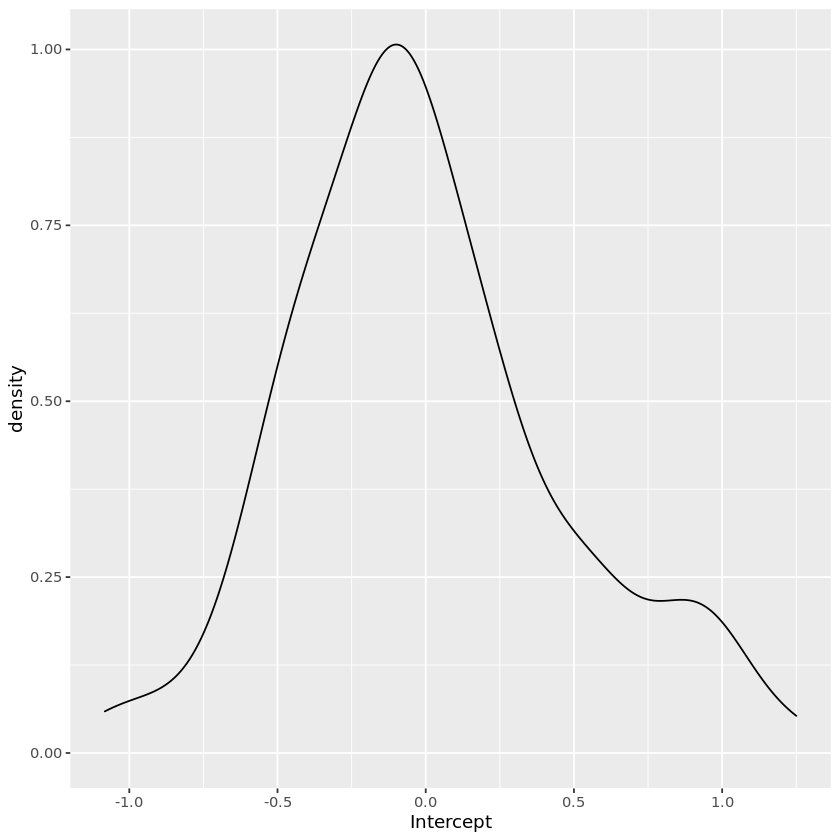

In [13]:
ggplot(re, aes(x=Intercept)) +
    geom_density()